# Additional Dataset Pre-processing

### Objectives
- Load dataset
- Look for null values and perform data imputation
- Visualize relationships between pairs of features
- Visualize correlation heatmap
- Select features for modelling

In [235]:
# Load labelled_mesonet_data CSVs from batch folders into single dataframe

import pandas as pd
from pathlib import Path

labeled_data_dir = Path('data/labeled_mesonet_data')
batch_folders = sorted(labeled_data_dir.glob('batch_*'))

all_dfs = []
for batch_folder in batch_folders:
    for csv_file in batch_folder.glob('*_measurements.csv'):
        df = pd.read_csv(csv_file)
        all_dfs.append(df)

df_combined = pd.concat(all_dfs, ignore_index=True)

print(f"Loaded {len(all_dfs)} CSV files from {len(batch_folders)} batches")
print(f"\nDataframe shape (rows, columns): {df_combined.shape}")
print(f"\nAll columns: {df_combined.columns.tolist()}")

Loaded 2741 CSV files from 28 batches

Dataframe shape (rows, columns): (1025763, 30)

All columns: ['time', 'airTemperature', 'avgGlobalSolarRadiation', 'barometricPressure', 'cumulativeGlobalSolarRadiation', 'dewPointTemperature', 'fireWeatherIndex', 'heatIndex', 'mslp', 'precipitation', 'precipitationRate', 'rainfall', 'reflectedShortwaveRadiation', 'relativeHumidity', 'seaSurfaceTemperature', 'seaSurfaceTemperature1m', 'snowDepth', 'snowfall', 'visibility', 'waveDirection', 'waveHeight', 'waveHeightMax', 'wetBulbTemperature', 'windChill', 'windDirection', 'windGust', 'windGust10m', 'windSpeed', 'windSpeed10m', 'TurbineScore']


In [236]:
# Remove rows that are largely null (except for 'time' and 'TurbineScore' columns)

df_combined.dropna(how='all', subset=df_combined.columns.difference(['time', 'TurbineScore']), inplace=True)
print(f"\nDataframe shape after dropping largely null rows: {df_combined.shape}")


Dataframe shape after dropping largely null rows: (858618, 30)


In [237]:
# Get statistics and null value counts

display(df_combined.describe()) # Display basic statistics

# Column null counts
null_counts = df_combined.isnull().sum().sort_values(ascending=False)
print(f'\nNull value counts per column: \n{null_counts}')

# Number of rows with no null columns
num_complete_rows = df_combined.dropna().shape[0]
print(f'\nNumber of complete rows (no nulls): {num_complete_rows}')

,airTemperature,avgGlobalSolarRadiation,barometricPressure,cumulativeGlobalSolarRadiation,dewPointTemperature,fireWeatherIndex,heatIndex,mslp,precipitation,precipitationRate,rainfall,reflectedShortwaveRadiation,relativeHumidity,seaSurfaceTemperature,seaSurfaceTemperature1m,snowDepth,snowfall,visibility,waveDirection,waveHeight,waveHeightMax,wetBulbTemperature,windChill,windDirection,windGust,windGust10m,windSpeed,windSpeed10m,TurbineScore
count,811000.000000,6.303300e+04,4.026130e+05,16322.000000,729534.000000,54743.000000,223.000000,398271.000000,4.223820e+05,26231.000000,283591.000000,264.000000,721859.000000,7782.000000,632.000000,103474.000000,15628.000000,103573.000000,6659.000000,12862.000000,8558.000000,182242.000000,225.000000,674327.000000,9.986500e+04,5.323690e+05,1.448070e+05,7.005970e+05,858618.000000
mean,4.749284,-1.915557e+27,-7.737897e+25,741.479261,-0.466643,8.496059,9.080835,1015.388914,-3.961043e+25,0.101072,0.338798,53.156970,72.700516,13.121557,13.867558,30.295369,2.800796,19.644610,204.104918,0.666042,1.786956,5.602005,5.247004,193.907188,-6.114396e+26,-1.362232e+26,-1.262156e+26,-3.098355e+25,0.901610
std,12.254847,1.736563e+29,4.909835e+28,457.151084,11.665375,8.856817,9.856910,11.619719,2.190073e+28,0.362739,1.246011,48.147096,15.654454,5.670312,3.585650,53.266908,8.062012,11.421563,61.428046,0.594322,1.719636,10.238480,11.863144,66.270606,1.805581e+29,9.287835e+28,4.802943e+28,2.593373e+28,0.104716
min,-55.283130,-1.678201e+31,-3.115378e+31,0.000000,-97.741667,0.000000,-18.925000,778.837500,-1.396151e+31,0.000000,0.000000,1.565000,-87.500000,-0.768354,4.625238,-27.125000,0.000000,0.000000,13.791667,0.000000,0.000000,-55.349179,-30.383333,-67.333333,-5.690757e+31,-6.758760e+31,-1.827688e+31,-2.170697e+31,0.000000
25%,-2.472728,1.088542e+02,9.560958e+02,379.156598,-6.703044,0.807458,4.991667,1009.797222,0.000000e+00,0.000000,0.000000,16.333063,63.161290,8.866667,11.359896,0.000000,0.000000,13.130333,162.250000,0.200000,0.500000,0.545087,1.527273,148.291667,8.941500e+00,1.197119e+01,3.717391e+00,4.769444e+00,0.871098
50%,6.675000,1.821071e+02,9.865375e+02,704.586373,1.373556,5.925696,11.550000,1015.587500,1.842105e-02,0.000000,0.000000,32.676479,74.416667,13.179167,14.089167,5.000000,0.909091,17.434167,211.375000,0.541667,1.237500,7.762149,8.057895,195.333333,1.363636e+01,1.797083e+01,6.616667e+00,8.206122e+00,0.926507
75%,14.475060,2.603208e+02,1.005250e+03,1053.185032,8.218109,13.500000,15.597143,1021.241667,2.883651e-01,0.027917,0.124863,91.230073,84.194338,17.425000,16.941875,38.129167,2.500000,24.140000,251.708333,1.000000,2.516667,12.996013,12.540000,242.791667,2.056667e+01,2.770000e+01,1.171250e+01,1.338333e+01,0.975335
max,391.183333,8.287321e+23,7.145204e+03,3151.720000,45.444737,86.500000,26.233333,1130.350000,8.287321e+23,15.988889,107.725549,255.160000,101.625000,29.950000,20.981250,694.000000,390.000000,80.500000,356.000000,6.833333,16.966667,31.725000,24.166667,423.384615,1.317000e+02,9.882125e+02,5.764608e+12,6.846470e+12,0.999718



Null value counts per column: 
heatIndex                         858395
windChill                         858393
reflectedShortwaveRadiation       858354
seaSurfaceTemperature1m           857986
waveDirection                     851959
seaSurfaceTemperature             850836
waveHeightMax                     850060
waveHeight                        845756
snowfall                          842990
cumulativeGlobalSolarRadiation    842296
precipitationRate                 832387
fireWeatherIndex                  803875
avgGlobalSolarRadiation           795585
windGust                          758753
snowDepth                         755144
visibility                        755045
windSpeed                         713811
wetBulbTemperature                676376
rainfall                          575027
mslp                              460347
barometricPressure                456005
precipitation                     436236
windGust10m                       326249
windDirection            

In [238]:
# Take columns with the least null value counts for further analysis and compare dataset size for different null count thresholds

selected_columns = [
    'mslp',
    'barometricPressure',
    'windDirection',
    'windSpeed10m',
    'relativeHumidity',
    'dewPointTemperature',
    'airTemperature',
    'TurbineScore'
]
df_selected = df_combined[selected_columns].copy()

# Number of rows with no/<2/<3 null values in selected columns
num_complete_selected_rows = df_selected.dropna().shape[0]
print(f'\nNumber of complete rows in selected columns: {num_complete_selected_rows}')

num_rows_at_most_1_null = df_selected[df_selected.isnull().sum(axis=1) <= 1].shape[0]
print(f'Number of rows with at most 1 null value in selected columns: {num_rows_at_most_1_null}')


Number of complete rows in selected columns: 368320
Number of rows with at most 1 null value in selected columns: 379036


In [239]:
# Perform data imputation on null values (median)

for column in selected_columns:
    if column != 'TurbineScore':
        median_value = df_selected[column].median()
        df_selected[column] = df_selected[column].fillna(median_value)

df_selected.head()

,mslp,barometricPressure,windDirection,windSpeed10m,relativeHumidity,dewPointTemperature,airTemperature,TurbineScore
13,1013.000000,960.428571,226.285714,0.575397,97.428571,-0.142857,0.214286,0.945056
14,1011.465000,958.952381,105.142857,1.558201,93.523810,-1.142857,-0.142857,0.945056
15,996.605000,945.000000,100.400000,3.050000,93.500000,1.000000,2.045000,0.945056
16,1011.122222,958.863636,84.727273,1.883838,93.909091,3.045455,3.945455,0.945056
17,1009.285714,957.238095,94.571429,2.463757,97.000000,2.714286,3.190476,0.945056


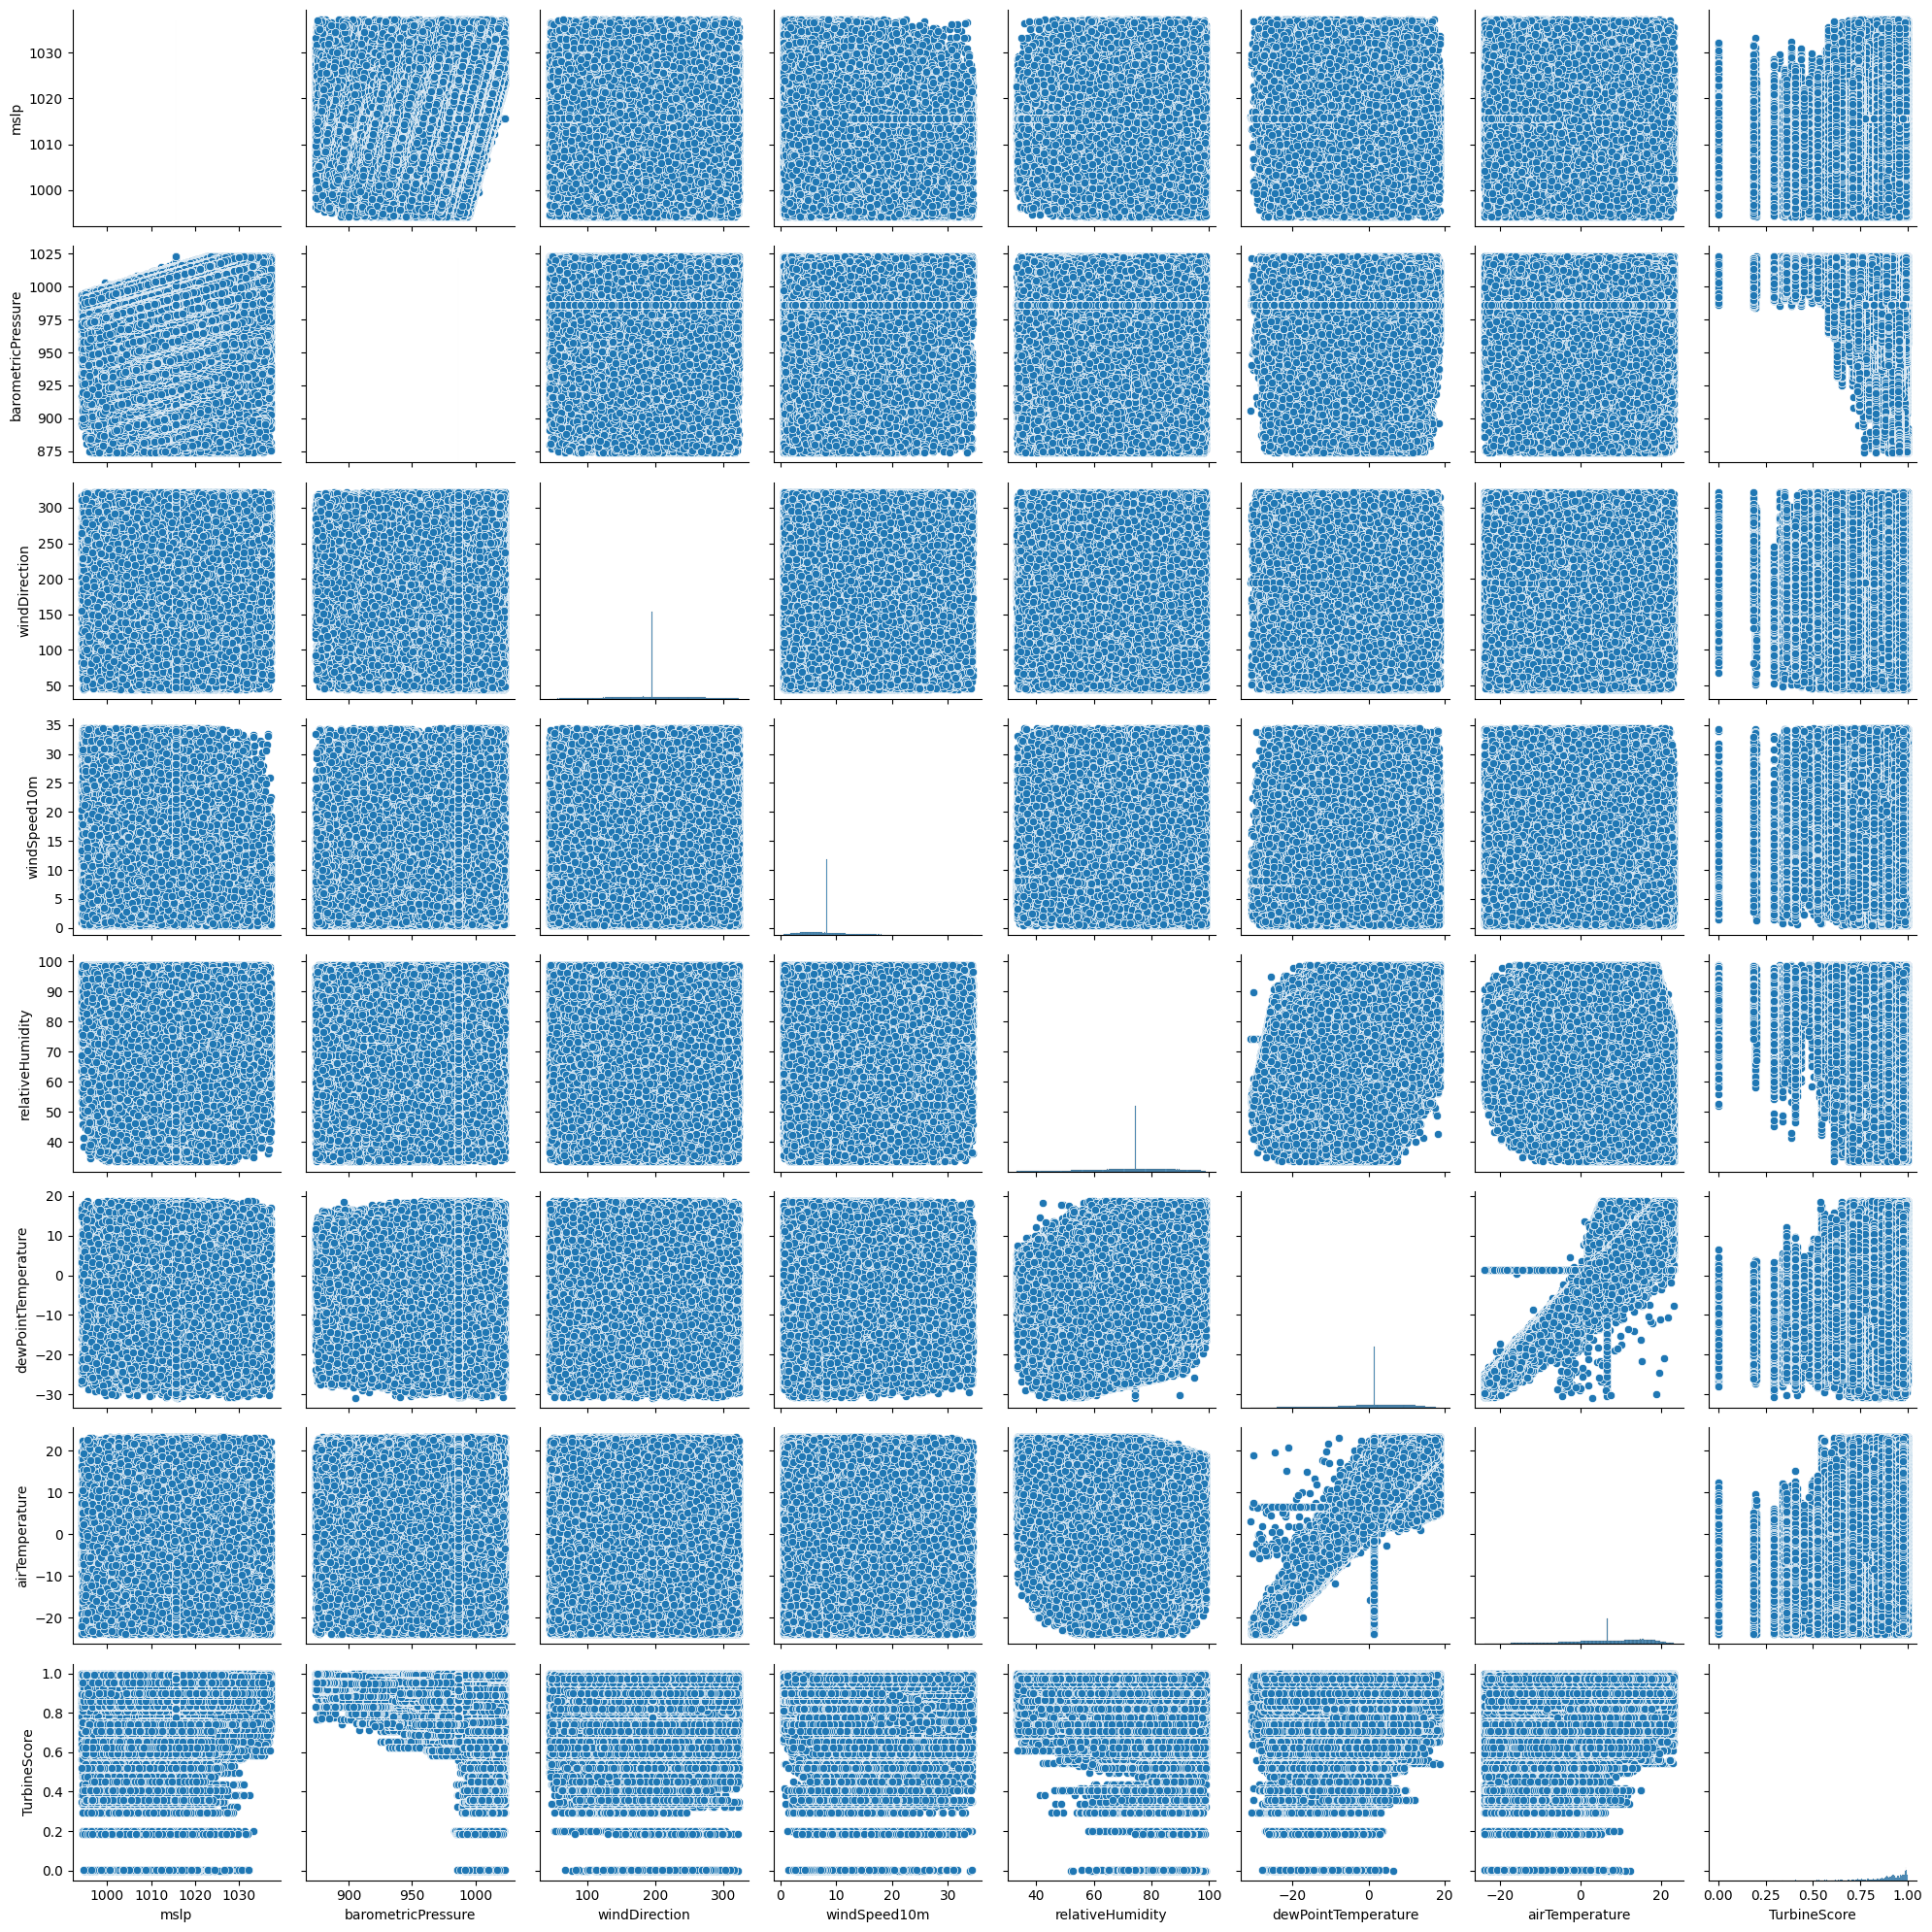

In [240]:
# Remove outliers (using percentile-based filtering) and visualize relationships between features

import matplotlib.pyplot as plt
import seaborn as sns

for column in selected_columns:
    if column != 'TurbineScore':
        lower_bound = df_selected[column].quantile(0.01)
        upper_bound = df_selected[column].quantile(0.99)
        df_selected = df_selected[(df_selected[column] >= lower_bound) & (df_selected[column] <= upper_bound)]

sns.pairplot(df_selected, height=2.5)
plt.tight_layout()
plt.show()

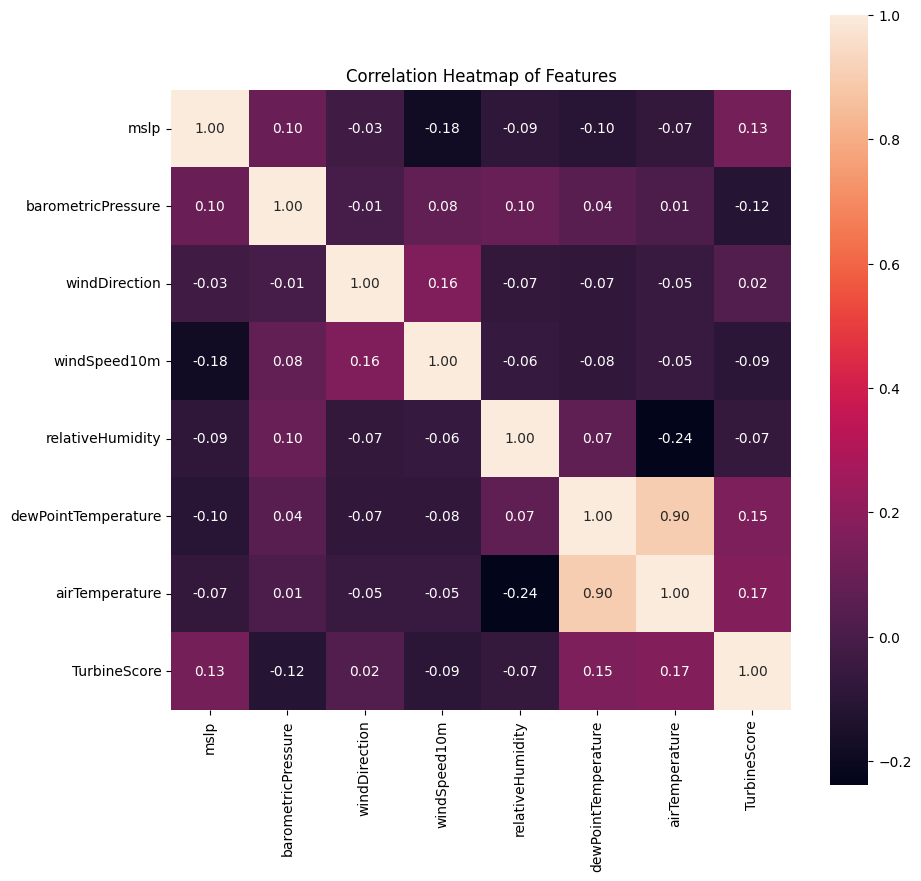

In [241]:
# Visualize correlation heatmap

correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 10))
hm = sns.heatmap(correlation_matrix, cbar=True,annot=True,
                 square=True, fmt='.2f',
                 yticklabels=correlation_matrix.columns,
                 xticklabels=correlation_matrix.columns)

plt.title("Correlation Heatmap of Features")
plt.show()

In [242]:
# Convert continous 'TurbineScore' to categorical labels for classification (threshold = 0.7)

df_selected['TurbineScore'] = df_selected['TurbineScore'].apply(lambda x: 1 if x >= 0.7 else 0)

# Train SVM

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score

X = df_selected[selected_columns[:-1]]
y = df_selected['TurbineScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma='scale'))
])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(f"\n--- PREDICTION RESULTS ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_test, y_pred))


--- PREDICTION RESULTS ---
Confusion Matrix:
 [[  1205   4304]
 [   261 143324]]
F1 Score:  0.6649219510428184
Recall:  0.6084576218853632
Precision:  0.8964050841850895
Accuracy:  0.9693817323299395
